# Khám phá dữ liệu qua các câu hỏi và câu trả lời


In [94]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Đọc dữ liệu đã tiền xử lý ở phần trước
df = pd.read_csv('../data/cleaned_dataset.csv')
df.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
2372,TP.HCM,2.0,Quản lý cấp trung,Không yêu cầu,1,Toàn thời gian cố định,Đại học,3 năm,Khoa học - Kỹ thuật/Nông - Lâm - Ngư nghiệp/Hó...,Dưới 10 người,1,10.0,20.0,15.0,21.0,35.0,28.0
1614,Hà Nội,1.8,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Không,1 năm,Bán sỉ - Bán lẻ - Quản lý cửa hàng/Chăm sóc kh...,10 - 150 người,2,7.0,12.0,9.5,22.0,40.0,31.0
2122,Bình Dương,2.0,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Trung cấp,1 năm,Sản xuất - Lắp ráp - Chế biến/Nghề nghiệp khác...,Trên 300 người,1,9.0,12.0,10.5,22.0,38.0,30.0
3134,Hưng Yên,2.0,Chuyên viên- nhân viên,Không yêu cầu,5,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh,10 - 150 người,1,15.0,30.0,22.5,22.0,40.0,31.0
1086,Khánh Hòa,2.0,Quản lý cấp trung,Nữ,1,Toàn thời gian cố định,Đại học,2 năm,Khách sạn - Nhà hàng - Du lịch/Vận Tải - Lái x...,10 - 150 người,1,12.0,14.0,13.0,35.0,45.0,40.0


## 1. Khám phá dữ liệu

- Các ngành nghề đăng tin tuyển dụng là các ngành nào?

In [96]:
carreer = pd.Series(df['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  53


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,1812
1,Chăm sóc khách hàng,754
2,Kế toán,708
3,Bán sỉ - Bán lẻ - Quản lý cửa hàng,686
4,Hành chính - Thư ký,610
5,Marketing,562
6,Khoa học - Kỹ thuật,469
7,Xây dựng,417
8,Tài chính - Đầu tư - Chứng Khoán,374
9,Kiểm toán,334


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

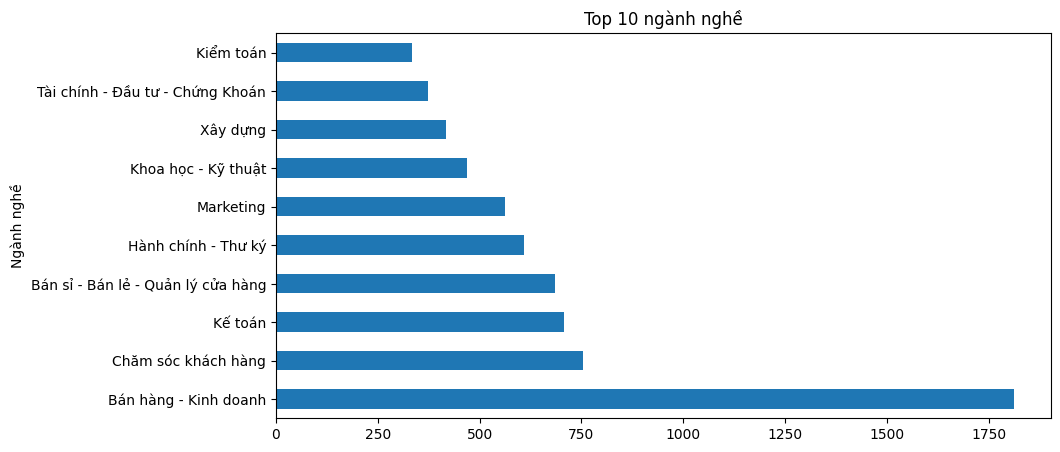

In [97]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [98]:
degree_requirements = pd.DataFrame(df['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,1817
1,Đại học,1057
2,Trung cấp,957
3,Không,628
4,Trung học,536
5,Chứng chỉ,64
6,Trên đại học,5


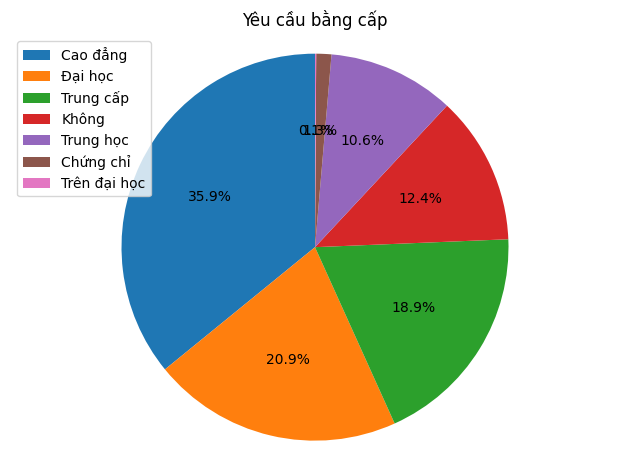

In [99]:
labels = degree_requirements['Yêu cầu bằng cấp']
sizes = degree_requirements['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu bằng cấp')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [100]:
exp_requirements = pd.DataFrame(df['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,1 năm,1741
1,Chưa có kinh nghiệm,1114
2,2 năm,881
3,Dưới 1 năm,739
4,3 năm,413
5,5 năm,106
6,Hơn 5 năm,44
7,4 năm,26


- Các cấp bậc tuyển là các cấp bậc nào?

In [101]:
level_df = pd.DataFrame(df['Cấp bậc'].value_counts())
level_df.reset_index(inplace=True)
level_df.columns = ['Cấp bậc', 'Số lượng']
level_df

,Cấp bậc,Số lượng
0,Chuyên viên- nhân viên,4318
1,Quản lý nhóm- giám sát,296
2,Quản lý cấp trung,245
3,Cộng tác viên,139
4,Quản lý cấp cao,42
5,Chuyên gia,23
6,Chưa cập nhật,1


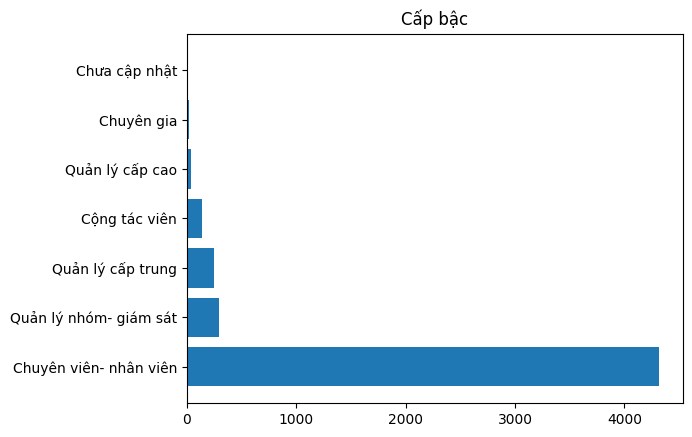

In [102]:
labels = level_df['Cấp bậc']
sizes = level_df['Số lượng']
plt.barh(labels, sizes)
plt.title('Cấp bậc')
plt.show()

- Yêu cầu về giới tính của các công việc

In [103]:
gender_df = pd.DataFrame(df['Yêu cầu giới tính'].value_counts())
gender_df.reset_index(inplace=True)
gender_df.columns = ['Giới tính', 'Số lượng']
gender_df

,Giới tính,Số lượng
0,Không yêu cầu,3296
1,Nam,1097
2,Nữ,671


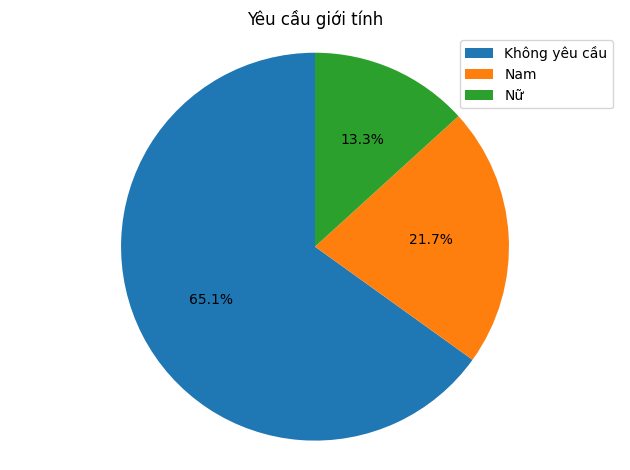

In [104]:
labels = gender_df['Giới tính']
sizes = gender_df['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu giới tính')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Độ tuổi trung bình tuyển nhân sự của các công việc 

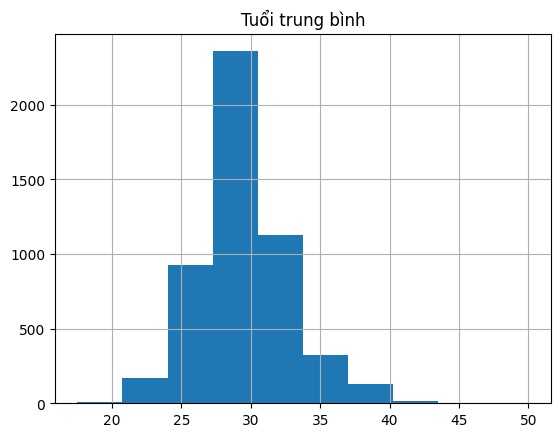

In [105]:
avg_age_df = pd.DataFrame(df['Tuổi trung bình'])
avg_age_df.hist(bins=10)
plt.title('Tuổi trung bình')
plt.show()

In [106]:
area_df = pd.Series(df['Khu vực tuyển']).str.split(',').explode().str.strip()
area_df = pd.DataFrame(area_df.value_counts())
area_df.reset_index(inplace=True)
area_df.columns = ['Khu vực', 'Số lượng']
area_df

,Khu vực,Số lượng
0,TP.HCM,2500
1,Hà Nội,1355
2,Bình Dương,402
3,Đồng Nai,173
4,Long An,157
...,...,...
59,Yên Bái,4
60,Hà Giang,3
61,Nước ngoài,2
62,Bắc Kạn,1


- Xét 10 khu vực có số lượng công việc tuyển nhiều nhất

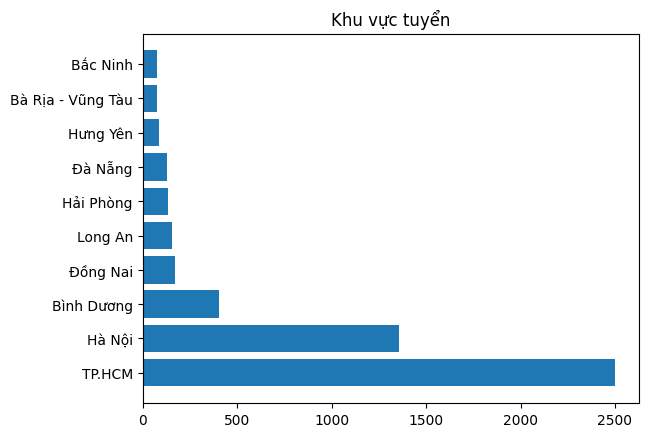

In [107]:
labels = area_df['Khu vực'].head(10)
sizes = area_df['Số lượng'].head(10)
plt.barh(labels, sizes)
plt.title('Khu vực tuyển')
plt.show()

## 2. Đặt câu hỏi và trả lời

Muc luong theo bang cap va kinh nghiem

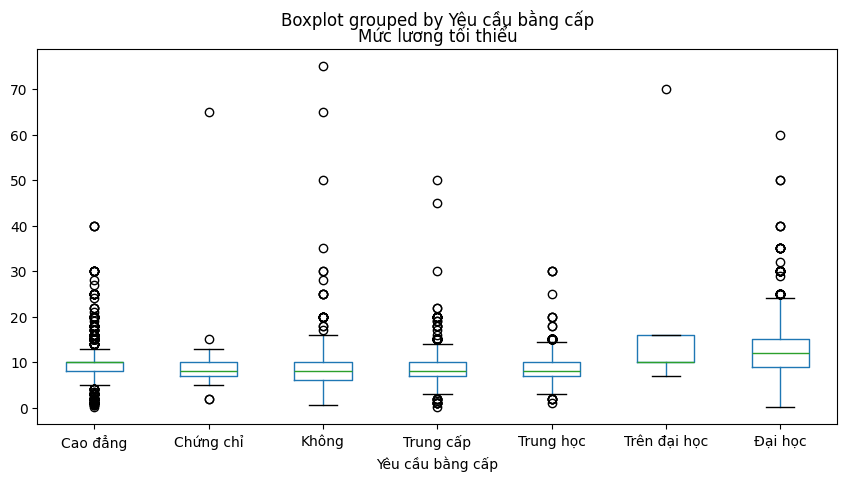

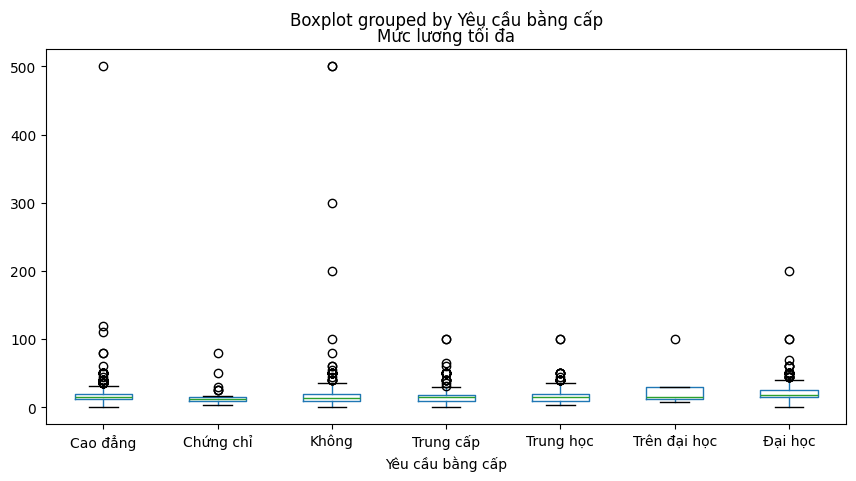

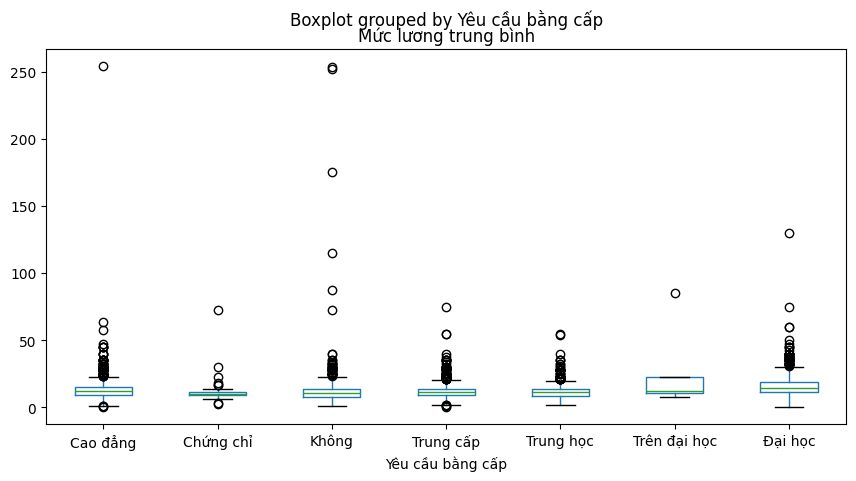

In [108]:
df.boxplot(column='Mức lương tối thiểu', by='Yêu cầu bằng cấp', figsize=(10, 5), grid=False)
df.boxplot(column='Mức lương tối đa', by='Yêu cầu bằng cấp', figsize=(10, 5), grid=False)
df.boxplot(column='Mức lương trung bình', by='Yêu cầu bằng cấp', figsize=(10, 5), grid=False)

plt.show()

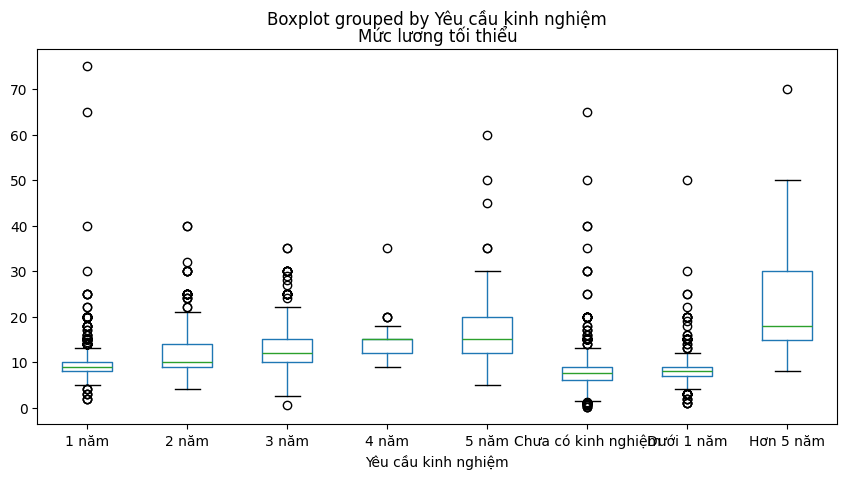

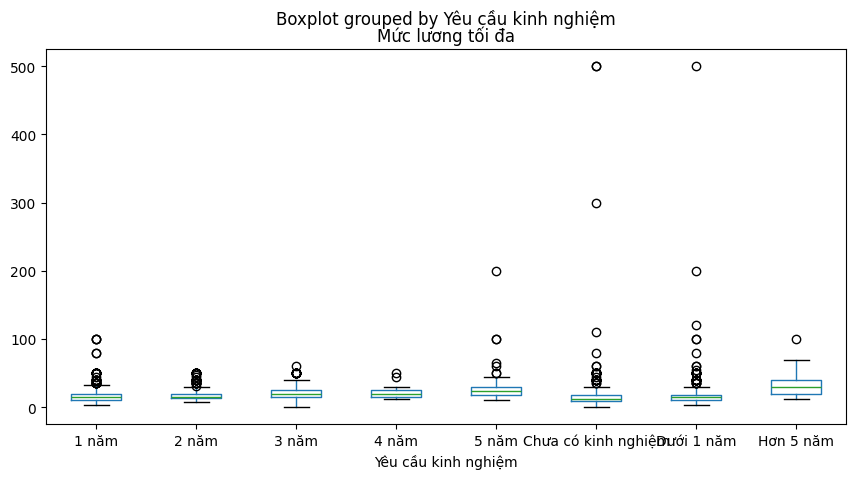

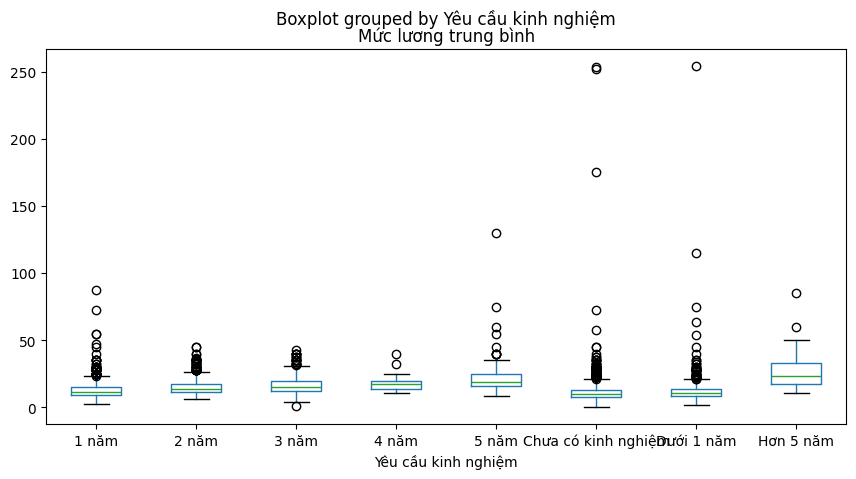

In [109]:
df.boxplot(column='Mức lương tối thiểu', by='Yêu cầu kinh nghiệm', figsize=(10, 5), grid=False)
df.boxplot(column='Mức lương tối đa', by='Yêu cầu kinh nghiệm', figsize=(10, 5), grid=False)
df.boxplot(column='Mức lương trung bình', by='Yêu cầu kinh nghiệm', figsize=(10, 5), grid=False)

plt.show()

Su khac biet theo gioi tinh

In [110]:
df_copy=df.copy()
df_copy['Yêu cầu giới tính']=df_copy['Yêu cầu giới tính'].replace('Không yêu cầu','Nam, Nữ')
df_copy['Yêu cầu giới tính'] = df_copy['Yêu cầu giới tính'].str.split(', ')
df_copy = df_copy.explode('Yêu cầu giới tính').reset_index(drop=True)
df_male=df_copy[df_copy['Yêu cầu giới tính']=='Nam']
df_female=df_copy[df_copy['Yêu cầu giới tính']=='Nữ']
df_copy

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
0,Hà Nội,2.000000,Chuyên viên- nhân viên,Nam,20,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Hành chính - Thư ký/Chăm sóc khách hàng/Ngân hàng,Trên 300 người,2,7.0,10.0,8.50,23.400000,37.600000,30.500000
1,Hà Nội,2.000000,Chuyên viên- nhân viên,Nữ,20,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Hành chính - Thư ký/Chăm sóc khách hàng/Ngân hàng,Trên 300 người,2,7.0,10.0,8.50,23.400000,37.600000,30.500000
2,TP.HCM,1.000000,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Đại học,2 năm,Xuất Nhập Khẩu/Hành chính - Thư ký/Thu mua - K...,10 - 150 người,1,10.0,15.0,12.50,22.000000,40.000000,31.000000
3,Hà Nội,1.000000,Chuyên viên- nhân viên,Nam,6,Toàn thời gian cố định,Không,Dưới 1 năm,Bán hàng - Kinh doanh/Hành chính - Thư ký/Điện...,10 - 150 người,2,10.0,30.0,20.00,22.400000,37.800000,30.100000
4,Hà Nội,1.000000,Chuyên viên- nhân viên,Nữ,6,Toàn thời gian cố định,Không,Dưới 1 năm,Bán hàng - Kinh doanh/Hành chính - Thư ký/Điện...,10 - 150 người,2,10.0,30.0,20.00,22.400000,37.800000,30.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,Gia Lai,1.800000,Chuyên viên- nhân viên,Nam,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,4.5,20.0,12.25,18.000000,25.000000,21.500000
8356,Gia Lai,1.800000,Chuyên viên- nhân viên,Nữ,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,4.5,20.0,12.25,18.000000,25.000000,21.500000
8357,TP.HCM,1.815368,Chuyên viên- nhân viên,Nam,1,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,15.0,25.0,20.00,22.487626,36.139211,29.313418
8358,TP.HCM,1.815368,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,15.0,25.0,20.00,22.487626,36.139211,29.313418


Ve tuoi trung binh

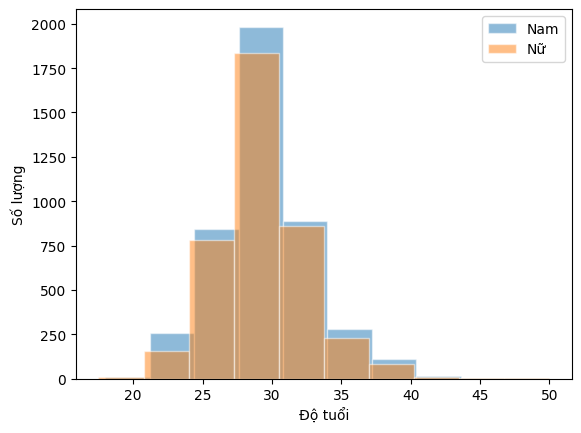

In [111]:
plt.hist(df_male['Tuổi trung bình'].dropna(),bins=10, edgecolor='white',alpha=0.5,label='Nam')
plt.hist(df_female['Tuổi trung bình'].dropna(),bins=10, edgecolor='white',alpha=0.5,label='Nữ')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.legend()
plt.show()


Ve muc luong trung binh

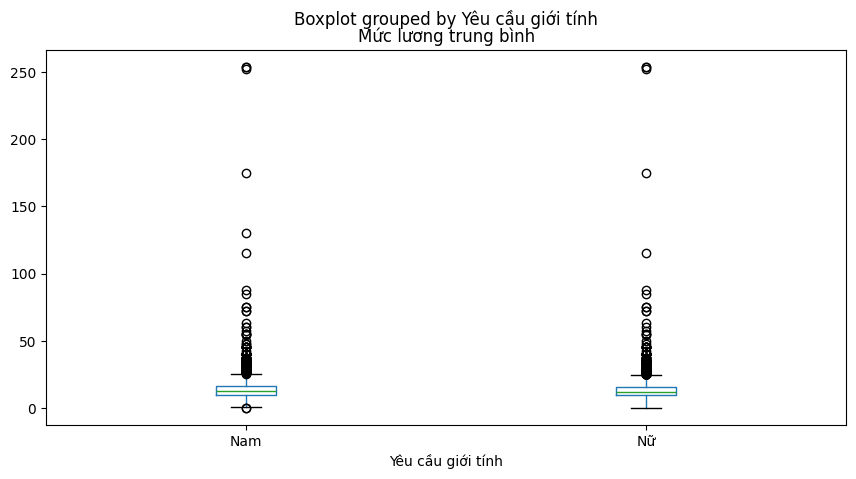

In [112]:
df_copy.boxplot(column='Mức lương trung bình', by='Yêu cầu giới tính', figsize=(10, 5), grid=False)
plt.show()

Nhu cau ve tung nganh nghe cu the o cac tinh

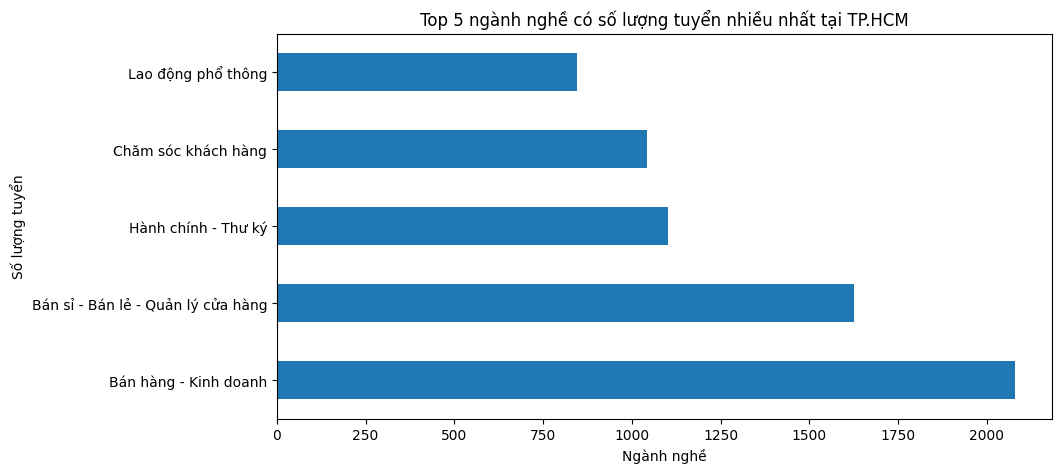

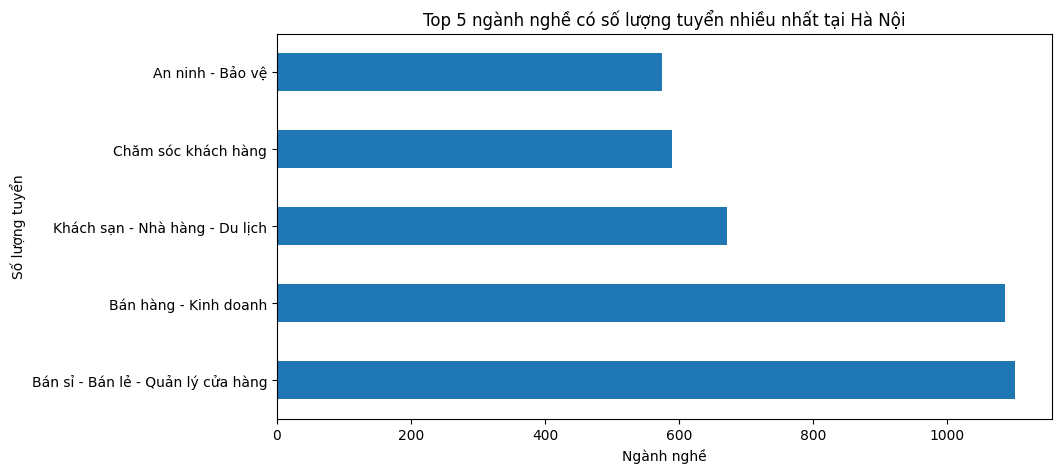

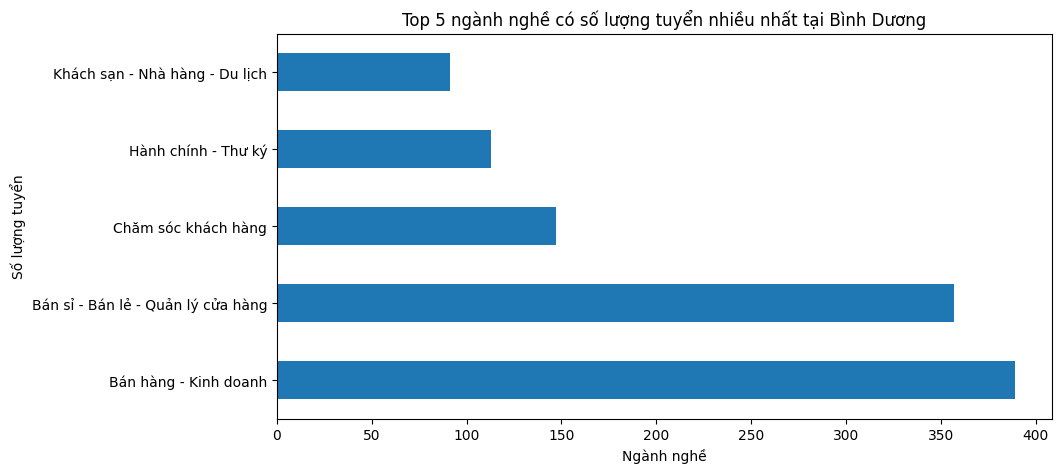

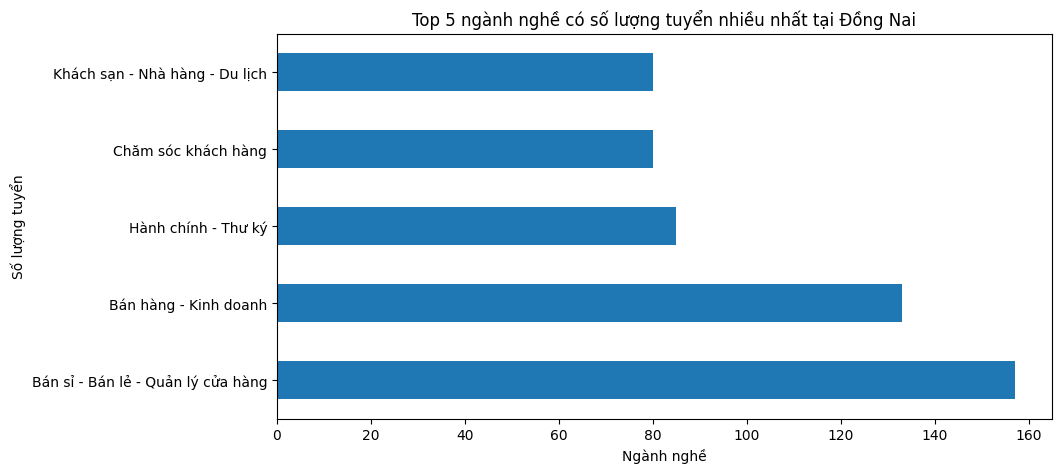

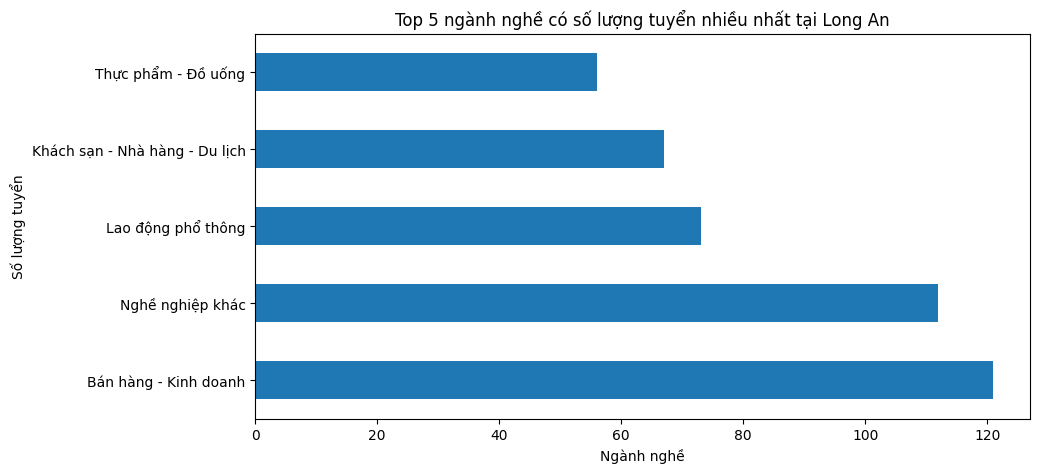

In [113]:
df_carreer=df.copy()
df_carreer['Ngành nghề'] = df['Ngành nghề'].str.split('/')
df_carreer = df_carreer.explode('Ngành nghề').reset_index(drop=True)
df_carreer['Khu vực tuyển'] = df['Khu vực tuyển'].str.split(', ')
df_carreer = df_carreer.explode('Khu vực tuyển').reset_index(drop=True)
df_carreer=df_carreer.groupby(['Khu vực tuyển','Ngành nghề'])['Số lượng tuyển'].sum()
df_carreer
top5area=area_df['Khu vực'].head(5)
top5area

for area in top5area:
    # Lọc df_carreer cho mỗi khu vực
    df_carreer_filtered = df_carreer[df_carreer.index.get_level_values('Khu vực tuyển') == area]

    # Nhóm dữ liệu và tính tổng
    df_carreer_grouped = df_carreer_filtered.groupby('Ngành nghề').sum()

    # Sắp xếp dữ liệu và lấy 5 ngành nghề đầu tiên
    top5_careers = df_carreer_grouped.sort_values(ascending=False).head(5)

    # Vẽ biểu đồ cột
    top5_careers.plot(kind='barh', figsize=(10, 5))
    plt.title(f'Top 5 ngành nghề có số lượng tuyển nhiều nhất tại {area}')
    plt.xlabel('Ngành nghề')
    plt.ylabel('Số lượng tuyển')
    plt.show()

Cung trinh do trong 1 nganh nghe, lieu co su khac biet trong luong giua nam va nu

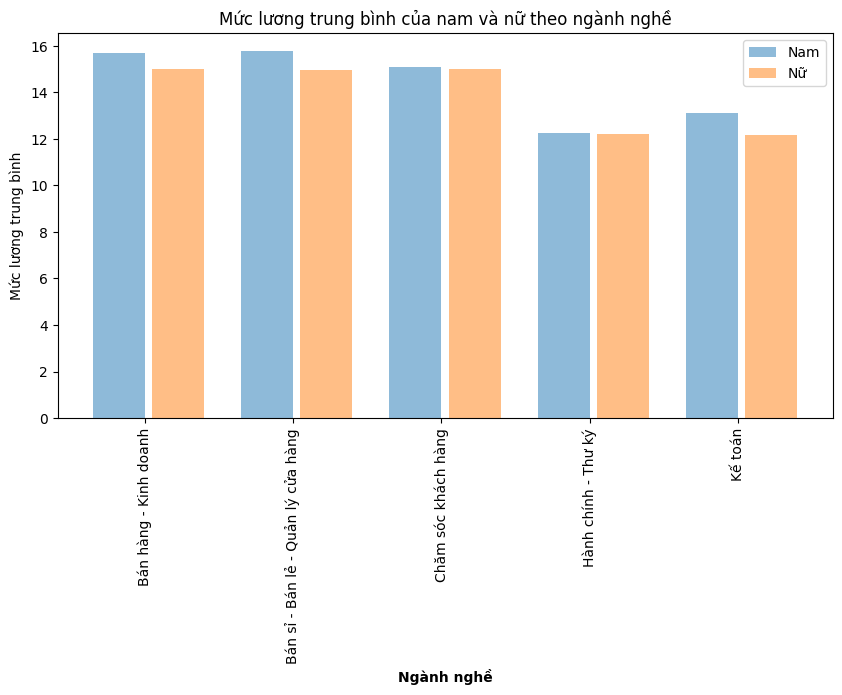

In [141]:
df_copy=df.copy()
df_copy['Yêu cầu giới tính']=df_copy['Yêu cầu giới tính'].replace('Không yêu cầu','Nam, Nữ')
df_copy['Yêu cầu giới tính'] = df_copy['Yêu cầu giới tính'].str.split(', ')
df_copy = df_copy.explode('Yêu cầu giới tính').reset_index(drop=True)
df_copy['Ngành nghề']=df_copy['Ngành nghề'].str.split('/')
df_copy = df_copy.explode('Ngành nghề').reset_index(drop=True)
df_copy['Khu vực tuyển'] = df_copy['Khu vực tuyển'].str.split(', ')
df_copy = df_copy.explode('Khu vực tuyển').reset_index(drop=True)
df_copy=df_copy.groupby(['Khu vực tuyển','Ngành nghề','Cấp bậc','Hình thức làm việc','Yêu cầu bằng cấp','Yêu cầu kinh nghiệm','Yêu cầu giới tính'])['Mức lương trung bình'].mean().reset_index()

# Lọc DataFrame df_copy
df_top10 = df_copy[df_copy['Ngành nghề'].isin(carreer_value.head(5)['Ngành nghề'])]
df_top10


# Tách DataFrame
df_male = df_top10[df_top10['Yêu cầu giới tính'] == 'Nam']
df_female = df_top10[df_top10['Yêu cầu giới tính'] == 'Nữ']

# Tính mức lương trung bình
average_male_salary = df_male.groupby('Ngành nghề')['Mức lương trung bình'].mean()
average_female_salary = df_female.groupby('Ngành nghề')['Mức lương trung bình'].mean()


bar_width = 0.35  # Increase the bar width

r1 = np.arange(len(average_male_salary))
r2 = [x + bar_width + 0.05 for x in r1]  # Add a small gap between the bars

plt.figure(figsize=(10, 5))

plt.bar(r1, average_male_salary.values, width=bar_width, alpha=0.5, label='Nam')
plt.bar(r2, average_female_salary.values, width=bar_width, alpha=0.5, label='Nữ')

plt.xlabel('Ngành nghề', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(average_male_salary))], average_male_salary.index, rotation=90)

plt.ylabel('Mức lương trung bình')
plt.title('Mức lương trung bình của nam và nữ theo ngành nghề')
plt.legend()
plt.show()